# Random Forest

This code loads a dataset of movie information, preprocesses it, and trains a Random Forest Classifier to predict whether a movie is "good" (i.e., has a rating of 7 or higher) using the binary feature "is_good". The code also trains a Random Forest Regressor to predict the IMDb rating of each movie. The accuracy of the classification model is calculated and printed, and the predicted and actual ratings of the regression model are plotted using Matplotlib. The plot provides a useful visualization of how well the regression model is performing, allowing us to identify areas for improvement.


Accuracy: 1.0


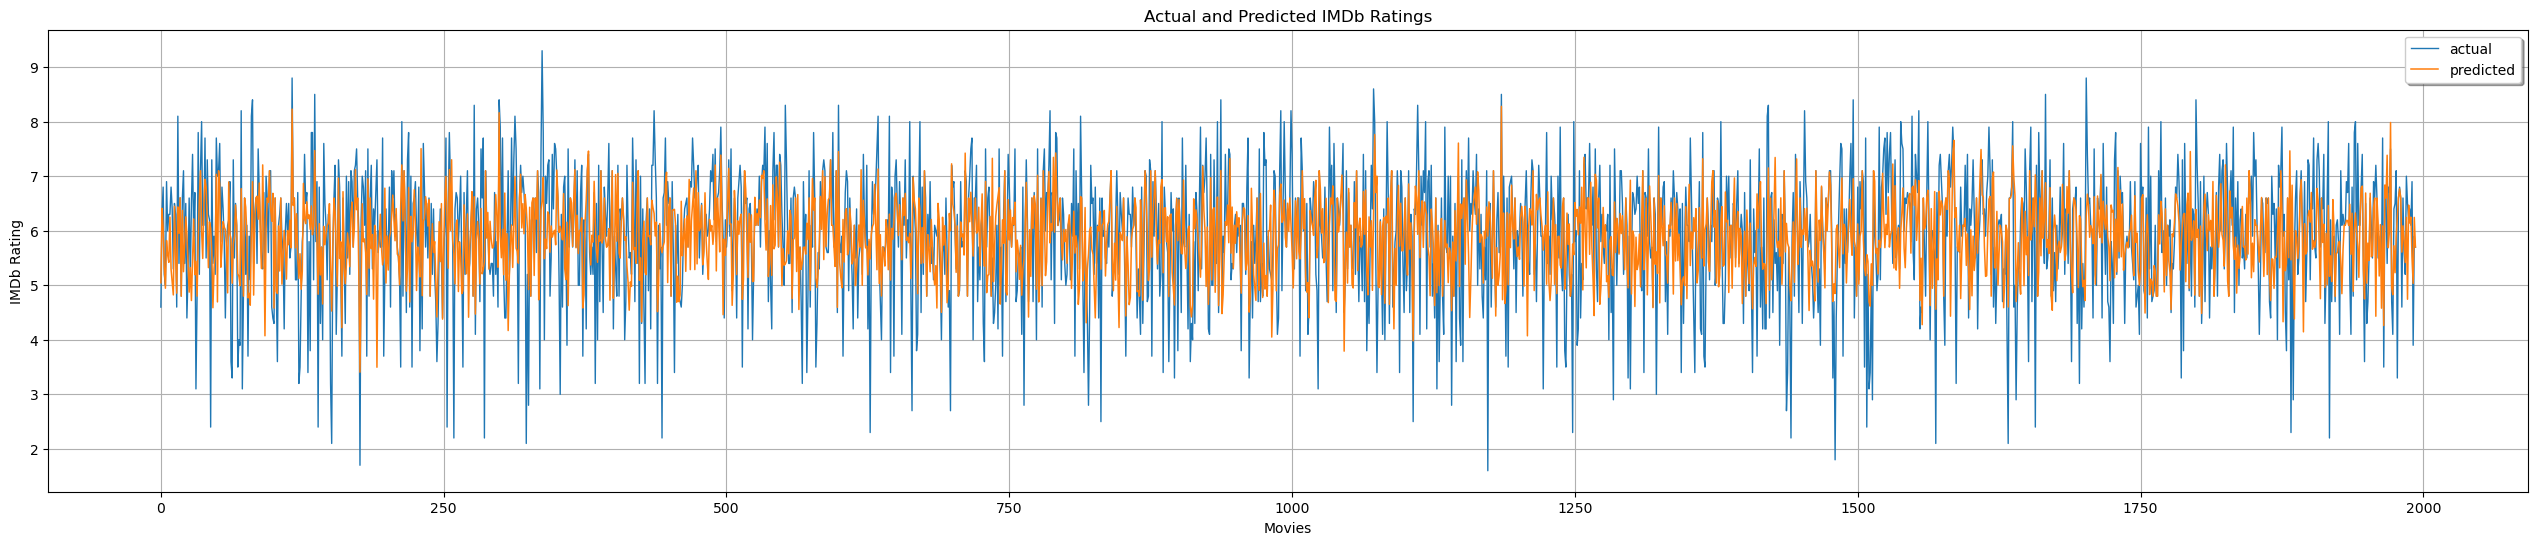

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned-df.csv')

# Preprocess the data
X = df[['IMDb-rating']].values
y = (df['IMDb-rating'] >= 7).astype(int).values # 'good' movies have a rating of 7 or higher

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Splitting the data into training and testing sets
X = df.drop(['IMDb-rating', 'id', 'title', 'director', 'appropriate_for', 'industry', 'language', 'posted_date', 'release_date', 'storyline', 'writer'], axis=1)
y = df['IMDb-rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the IMDb ratings for the test set
ypred = rf_model.predict(X_test)

# Plotting the actual and predicted IMDb ratings

fig, ax = plt.subplots(figsize=(32, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="actual")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("Actual and Predicted IMDb Ratings")
plt.xlabel('Movies')
plt.ylabel('IMDb Rating')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [5]:
import numpy as np

# Get feature importances from the model
importances = rf_model.feature_importances_

# Print feature importances in descending order
indices = np.argsort(importances)[::-1]
print('Feature Importances:')
for i in indices:
    print('{}: {:.2f}%'.format(X.columns[i], importances[i]*100))


Feature Importances:
run_time: 26.51%
downloads: 23.71%
views: 23.35%
Unnamed: 0: 13.28%
Unnamed: 0.1: 13.14%


In [6]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error (MSE) between the actual and predicted ratings
mse = mean_squared_error(y_test, ypred)
print('Mean squared error:', mse)

# Calculate the root mean squared error (RMSE) between the actual and predicted ratings
rmse = mean_squared_error(y_test, ypred, squared=False)
print('Root mean squared error:', rmse)


Mean squared error: 1.1463753725158619
Root mean squared error: 1.070689204445371


In [22]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[1601    0]
 [   0  393]]


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
